In [ ]:
# connect google drive with colab
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [ ]:
# import what we need
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img, save_img
from tensorflow.keras import layers, models

In [ ]:
# using pydrive library to download dataset from google drive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
# download the dataset 
download = drive.CreateFile({'id': '1vY37AOcpIhugM45niCYnKboONqwkB0a7'})  
download.GetContentFile('dataset.zip')

In [ ]:
# unzip the dataset
!unzip /content/dataset.zip -d /content/data

Archive:  /content/dataset.zip
  inflating: /content/data/Training_set/Training_set/electric bus/821c1f91.jpg  
  inflating: /content/data/Training_set/Training_set/electric bus/electric_bus-  13.jpeg  
  inflating: /content/data/Training_set/Training_set/electric bus/electric_bus-10.jpeg  
  inflating: /content/data/Training_set/Training_set/electric bus/electric_bus-100.jpeg  
  inflating: /content/data/Training_set/Training_set/electric bus/electric_bus-101.jpeg  
  inflating: /content/data/Training_set/Training_set/electric bus/electric_bus-102.jpeg  
  inflating: /content/data/Training_set/Training_set/electric bus/electric_bus-103.jpeg  
  inflating: /content/data/Training_set/Training_set/electric bus/electric_bus-104.jpeg  
  inflating: /content/data/Training_set/Training_set/electric bus/electric_bus-105.jpeg  
  inflating: /content/data/Training_set/Training_set/electric bus/electric_bus-106.jpeg  
  inflating: /content/data/Training_set/Training_set/electric bus/electric_bus

In [ ]:
# image data generator fron training data
train_datagen = ImageDataGenerator(rescale=1/255.0)
train_generator = train_datagen.flow_from_directory(
    '/content/data/Training_set/Training_set',
    target_size=(128, 128),
    color_mode='rgb',
    batch_size=32,
    class_mode='binary')  

Found 1486 images belonging to 2 classes.


In [ ]:
# image data generator fron validation data
val_datagen = ImageDataGenerator(rescale=1/255.0)
val_generator = val_datagen.flow_from_directory(
    '/content/data/test/test',
    target_size=(128, 128),
    color_mode='rgb',
    batch_size=16,
    class_mode='binary')  

Found 382 images belonging to 2 classes.


In [ ]:
# define my model
model = models.Sequential()
model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(128,128,3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))


model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(128, activation='relu'))

model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 64)        3

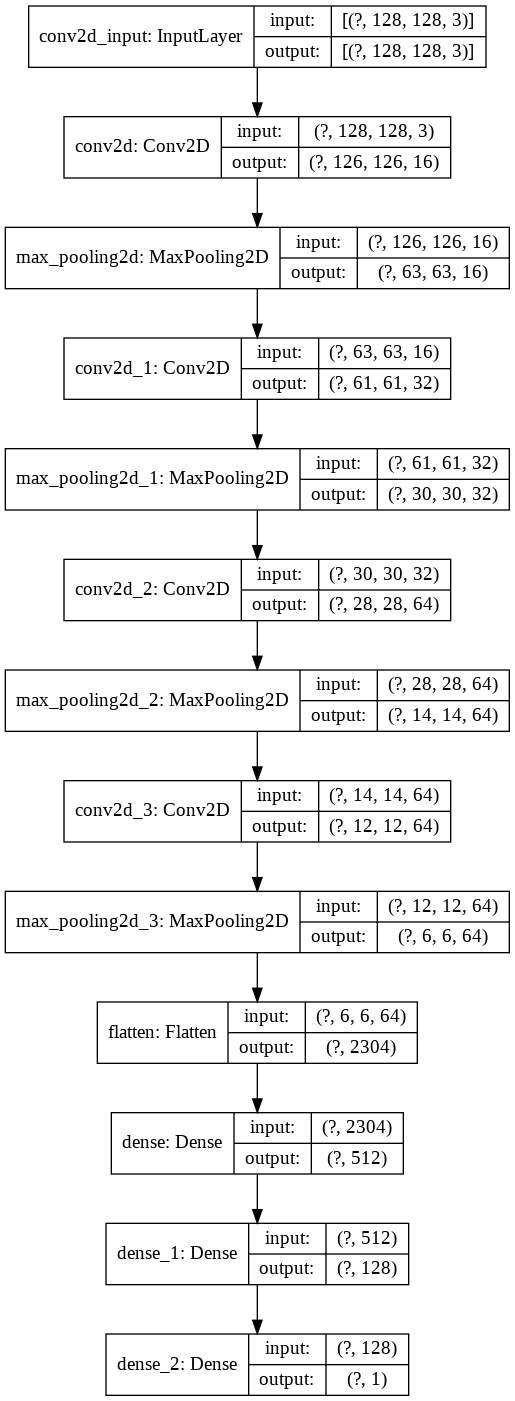

In [ ]:
# plot the model architecture
tf.keras.utils.plot_model(
    model,
    to_file='model.png',
    show_shapes=True,
    show_layer_names=True,
    rankdir='TB',
    expand_nested=False,
    dpi=96,
)

In [ ]:
# initiat Adam optimizer with 1e-3 learning rate
opt = tf.keras.optimizers.Adam(lr=1e-3)

In [ ]:
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(
      train_generator,
      steps_per_epoch=np.ceil(1486 /32), 
      epochs=5,
      verbose=1,
      validation_data = val_generator,
      validation_steps=np.ceil(382 /16))

Epoch 1/5
47/47 [==============================] - 26s 564ms/step - loss: 0.5225 - accuracy: 0.7382 - val_loss: 0.4264 - val_accuracy: 0.8298
Epoch 2/5
47/47 [==============================] - 25s 537ms/step - loss: 0.3679 - accuracy: 0.8371 - val_loss: 0.3705 - val_accuracy: 0.8298
Epoch 3/5
47/47 [==============================] - 27s 571ms/step - loss: 0.3323 - accuracy: 0.8634 - val_loss: 0.3470 - val_accuracy: 0.8429
Epoch 4/5
47/47 [==============================] - 25s 536ms/step - loss: 0.2604 - accuracy: 0.8991 - val_loss: 0.3452 - val_accuracy: 0.8508
Epoch 5/5
47/47 [==============================] - 25s 538ms/step - loss: 0.2233 - accuracy: 0.9166 - val_loss: 0.3041 - val_accuracy: 0.8822


[[0.95640075]]
electric car


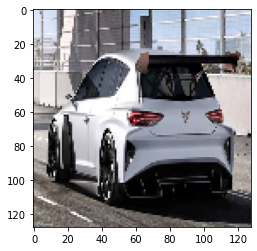

In [ ]:
# load image and test the model
img = load_img('/content/data/test/test/electric car/electric__image-104.jpeg', color_mode='rgb', target_size=(128,128))
img_array = img_to_array(img)/255.0 
x = np.expand_dims(img_array, 0)

out = model.predict(x)
print(out)
if out <0.5:
  print('electric bus')
else:
   print('electric car')

plt.imshow(img)

Text(0.5, 1.0, 'Training and validation loss')

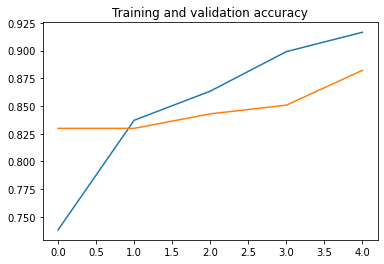

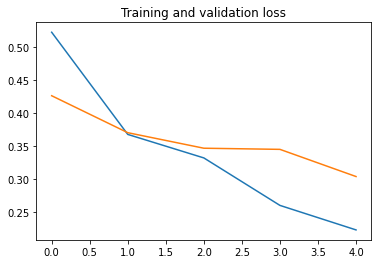

In [ ]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and validation data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )